# Cases

Esta tabla contiene la información de las sentencias de tipo Match. --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

full_table = get_data('cases')

# Table name, features and target.
TABLE_NAME = 'cases'
TABLE_FEATURES = ['case__number_of_cases', 'case__guards', 'case__average_match_value', 'case__average_body_count', 'case__average_match_singleton', 'case__average_match_sequence', 'case__average_match_mapping', 'case__average_match_class', 'case__average_match_star', 'case__average_match_as', 'case__average_match_or', 'case__expertise_level']
TABLE_TARGET = 'case__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

2024-05-14 11:38:58.040197 Loading data ...
2024-05-14 11:38:58.645894 Data successfully load!!
2024-05-14 11:38:58.645894 Creating data cache files ...
2024-05-14 11:38:58.647901 Data cache files successfully created!!
Features shape: (28, 12)
Target shape: (28,)
As we can see the downloaded data contains a total of 28 instances. Each of the instances corresponds to a program. For each program we have 12 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   case__number_of_cases          28 non-null     int64  
 1   case__guards                   28 non-null     float64
 2   case__average_match_value      28 non-null     float64
 3   case__average_body_count       28 non-null     float64
 4   case__average_match_singleton  28 non-null     float64
 5   case__average_match_sequence   28 non-null     float64
 6   case__average_match_mapping    28 non-null     float64
 7   case__average_match_class      28 non-null     float64
 8   case__average_match_star       28 non-null     float64
 9   case__average_match_as         28 non-null     float64
 10  case__average_match_or         28 non-null     float64
 11  case__expertise_level          28 non-null     object 
dtypes: float64(10), int64(1), object(1)
memory usage: 2.

Cómo podemos ver la tabla está compuesta por 11 variables numéricas y una de tipo objeto. Esta última variable es la clase con la que se ha etiquetado la instancia. Sin embargo, en algunas ocasiones esta última clase no la vamos a utilizar. Por ejemplo, si queremos obtener clusters por medio de aprendizaje no supervisado.

### 2.1 - Balance de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for EXPERT class.")

The dataset contains 0.0% instances for BEGINNER class and 100.0% for EXPERT class.


### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [5]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES + [TABLE_TARGET]))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [64.29%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [6]:
X.isnull().sum()

case__number_of_cases            0
case__guards                     0
case__average_match_value        0
case__average_body_count         0
case__average_match_singleton    0
case__average_match_sequence     0
case__average_match_mapping      0
case__average_match_class        0
case__average_match_star         0
case__average_match_as           0
case__average_match_or           0
case__expertise_level            0
dtype: int64

Aunque una columna no contenga valores nulos podría ser que contenga valores vacíos. Si los hubiese la siguiente función los mostraría.

In [11]:
print_empty_cols(X)

import__number_imports
----------------------
0 instancias no tienen un valor para la columna import__number_imports


import__module_imports_pct
--------------------------
0 instancias no tienen un valor para la columna import__module_imports_pct


import__average_imported_modules
--------------------------------
0 instancias no tienen un valor para la columna import__average_imported_modules


import__from_imports_pct
------------------------
0 instancias no tienen un valor para la columna import__from_imports_pct


import__average_from_imported_modules
-------------------------------------
0 instancias no tienen un valor para la columna import__average_from_imported_modules


import__average_as_in_imported_modules
--------------------------------------
0 instancias no tienen un valor para la columna import__average_as_in_imported_modules


import__local_imports_pct
-------------------------
0 instancias no tienen un valor para la columna import__local_imports_pct


import__expertise

### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case__number_of_cases,28.0,NaN,NaN,NaN,5.178571,9.526002,2.0,2.0,3.0,4.0,51.0
case__guards,28.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
case__average_match_value,28.0,NaN,NaN,NaN,0.715288,0.222522,0.5,0.5,0.666667,1.0,1.0
case__average_body_count,28.0,NaN,NaN,NaN,1.915812,0.693607,1.0,1.159804,2.333333,2.5,3.0
case__average_match_singleton,28.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
case__average_match_sequence,28.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
case__average_match_mapping,28.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
case__average_match_class,28.0,NaN,NaN,NaN,0.00188,0.009946,0.0,0.0,0.0,0.0,0.052632
case__average_match_star,28.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
case__average_match_as,28.0,NaN,NaN,NaN,0.282832,0.224309,0.0,0.0,0.333333,0.5,0.5


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "case__number_of_cases": [(0.0, 2.0), (2.0, 3.0), (3.0, 4.0), (4.0, inf)],  # min: 2.0 max: 51.0 
    "case__guards": [(0.0, 0.0)],  # min: 0.0 max: 0.0 
    "case__average_match_value": [(0.0, 0.5), (0.5, 0.67), (0.67, inf)],  # min: 0.5 max: 1.0 
    "case__average_body_count": [(0.0, 1.15), (1.15, 2.33), (2.33, 2.5), (2.5, inf)],  # min: 1 max: 3.0 
    "case__average_match_singleton": [(0.0, 0.0)],  # min: 0 max: 0 
    "case__average_match_sequence": [(0.0, 0.0)],  # min: 0 max: 0 
    "case__average_match_mapping": [(0.0, 0.0)],  # min: 0 max: 0 
    "case__average_match_class": [(0.0, inf)],  # min: 0 max: 0.0526 
    "case__average_match_star": [(0.0, 0.0)],  # min: 0 max: 0 
    "case__average_match_or": [(0.0, 0.0)],  # min: 0 max: 0 
    "case__average_match_as": [(0.0, 0.0), (0.0, 0.34), (0.34, inf)],  # min: 0 max: 0.5
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['case__number_of_cases'], 10))
print(get_statistics(X_copy, ['case__guards'], 10))
print(get_statistics(X_copy, ['case__average_body_count'], 10))
print(get_statistics(X_copy, ['case__average_match_singleton'], 10))
print(get_statistics(X_copy, ['case__average_match_value'], 10))
print(get_statistics(X_copy, ['case__average_match_sequence'], 10))
print(get_statistics(X_copy, ['case__average_match_mapping'], 10))
print(get_statistics(X_copy, ['case__average_match_class'], 10))
print(get_statistics(X_copy, ['case__average_match_star'], 10))
print(get_statistics(X_copy, ['case__average_match_or'], 10))
print(get_statistics(X_copy, ['case__average_match_as'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['import__average_imported_modules', 'import__module_imports_pct'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['program__has_sub_dirs_with_code', 'program__has_packages', 'program__has_code_root_package'], 10))

--- SINGLE FEATURE ---
case__number_of_cases  count  percentage
            [2.0_3.0)     12   42.857143
            [4.0_inf]     10   35.714286
            [3.0_4.0)      6   21.428571

case__guards  count  percentage
   [0.0_0.0]     28       100.0

case__average_body_count  count  percentage
               [2.5_inf]     13   46.428571
              [0.0_1.15)      7   25.000000
             [1.15_2.33)      6   21.428571
              [2.33_2.5)      2    7.142857

case__average_match_singleton  count  percentage
                    [0.0_0.0]     28       100.0

case__average_match_value  count  percentage
               [0.5_0.67)     17   60.714286
               [0.67_inf]     11   39.285714

case__average_match_sequence  count  percentage
                   [0.0_0.0]     28       100.0

case__average_match_mapping  count  percentage
                  [0.0_0.0]     28       100.0

case__average_match_class  count  percentage
                [0.0_inf]     28       100.0

case__av

El caso con has_packages = true y has_sub_dirs_with_code = false es el proyecto de expertos "12306" nada raro ahí.

IMPORTANTE: Fijate que hay 544 programas sin clases, funciones ni enums -> la asignatura se divide en tres partes, sintaxis, sentencias de control y finalmente funciones. Es decir durante dos terceras partes no saben lo que son funciones. Ademas no usan clases.

In [9]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (28, 12)
Target shape: (28,)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

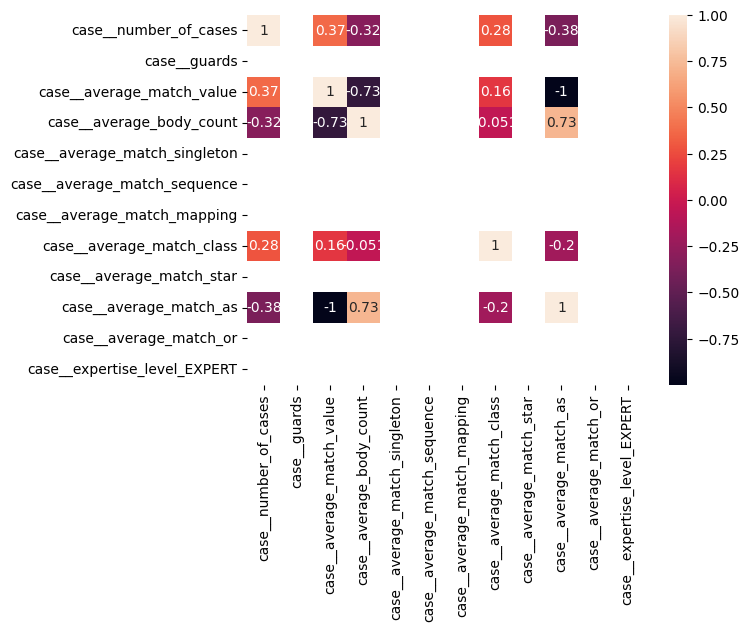

In [10]:
sns.heatmap(X.corr(), annot=True)

--> ABEL COMPLETAR <-- De la matriz anterior ya podemos sacar alguna conclusión que puede parecer obvia. Por ejemplo podemos secir que cuantas más interfaces tiene un programa menos clases va a tener. Y, lo mismo se aplica a las variables que representan si el código está en paquetes o no.

## 3 - Detección de valores atípicos (outliers)
Una vez sabemos qué datos contiene la tabla, analizaremos los valores que toma cada una de las variables de cada instancia. El objetivo es identificar posibles valores atípicos que nos dificulten la realización de futuras tareas. 
Tras su análisis, se puede concluir que un valor:
    - **Es erróneo**. En este caso hay que tomar una decisión para cada caso, siendo los tratamientos más extendidos son listwise, pairwise, drop variables, mean/median imputation, most frequent, separate category, zero imputation, cold deck, hot deck,(stochastic) regression, k-NN and multiple imputation. Los resultados de imputación regresiva, k-NN y múltiple dan buenos resultados, aunque, como se ha indicado, es necesario el estudio en cada caso.
    - **Es correcto, pero anómalo**. Se documenta su existencia para su posible discusión y se mantiene en el dataset. En estos casos se hace necesaria la utilización de algoritmos y estadísticos que no sean muy sensibles a dichos valores anómalos.

## Univariate
Para cada uno de los atributos se debe realizar un análisis y detección de valores atípicos, estudiando su posible causa. 
Existen diversas formas de calcular los valores anómalos. 

### Variables numéricas
Para las variables numéricas, se suele identificar: 
    - a) Valor atípico leve es el que está fuera de $[Q1 - 1.5IQR, Q3 + 1.5IQR]$, donde $IQR = Q3-Q1$.
    - b) Valor atípico extremo está fuera de $[Q1 - 3IQR, Q3 + 3IQR]$.

La idea es probar con a) y si hay pocas instancias analizarlas. Si hubiese muchas, mirar b) y analizar si fuesen pocas. No hay un algoritmo o método estipulado, puesto que depende del dominio del problema y de los datos.

Los límites de Tukey se basan en los cuartiles de los datos y son sensibles a la presencia de sesgo en la distribución. Cuando hay asimetría en los datos, los límites de Tukey pueden no ser tan efectivos para identificar outliers de manera equitativa en ambos extremos de la distribución. El Coeficiente de Medcouple es útil para identificar la asimetría en los datos, especialmente en presencia de valores atípicos o sesgados. Es una medida robusta porque no se ve tan afectada por valores extremos como la media y la desviación estándar. El MC puede proporcionar información adicional sobre la asimetría de la distribución, lo que te permite ajustar los límites de Tukey de manera más apropiada para tu conjunto de datos específico. Una posible variacion de los límites de Tukey teniendo en cuenta MC podria ser: 
   - Si MC es mayor que 0 (asimetría hacia la derecha):
      - low = (q1-1.5 * math.exp(-4*mc) * iqr)
      - high = (q3+1.5 * math.exp(3.5*mc) * iqr)
   - Si la asimetriza es hacia la izquierda:    
      - low = (q1-1.5 * math.exp(-3.5*mc) * iqr)
      - high = (q3+1.5 * math.exp(4*mc) * iqr)


### Variables categóricas
Para las variables categóricas no existe el concepto de valor anómalo, pero sí se puede considerar en base a un análisis de frecuencia. Por ejemplo, que el uso de una categoría sea residual, pudiendo tener un 0.1% de instancias en el dataset. Para detectar estos valores, se puede fijar un valor mínimo de frecuencia en función del número posible de valores de la variable categórica (2 en el caso de una variable booleana). Por ejemplo, un umbral de $\frac{0.2\%}{valores}$ (0.1% en el caso de una variable booleana)

## Analisis detallado de variables
Para cada una de las 11 variable (11 numéricas) se hara un analisis detallado 

### Variable number_of_cases (1/11)
Esta variable es de tipo numérica y nos indica el número de clausulas case en la sentencia. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 2 - 51. Con una media de 5.17.

<Axes: ylabel='case__number_of_cases'>

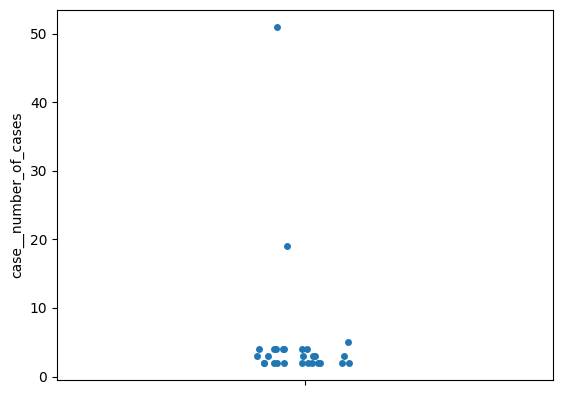

In [11]:
sns.stripplot(X['case__number_of_cases'])

In [12]:
print_outliers_for_df_column(X, 'case__number_of_cases')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7937734008778234
Rango valores atípicos extremos (Tukey): [-4.0,10.0]
Rango valores atípicos leves (Tukey): [-1.0,7.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.8135504553191006,75.78717882265299]
-3.0IQR: 0 instancias tienen un valor para case__number_of_cases inferior a -4.0 (Q1-3*IQR) para case__number_of_cases. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para case__number_of_cases inferior a -1.0 (Q1-1.5*IQR) para case__number_of_cases. Representando un 0.0% del total de instancias.
+1.5IQR: 2 instancias tienen un valor para case__number_of_cases superior a 7.0 (Q3+1.5*IQR) para case__number_of_cases. Representando un 7.143% del total de instancias.
+3.0IQR: 2 instancias tienen un valor para case__number_of_cases superior a 10.0 (Q3-3*IQR) para case__number_of_cases. Representando un 7.143% del total de instancias.
L: 0 instancias tienen un valor para case__number_of_cases

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 9 (Tukey rango extremo)

In [13]:
X[X['case__number_of_cases'] > 10].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,case__number_of_cases,case__guards,case__average_match_value,case__average_body_count,case__average_match_singleton,case__average_match_sequence,case__average_match_mapping,case__average_match_class,case__average_match_star,case__average_match_as,case__average_match_or,case__expertise_level_EXPERT
count,2.000000,2.0,2.000000,2.000000,2.0,2.0,2.0,2.000000,2.0,2.000000,2.0,2.0
mean,35.000000,0.0,0.947368,1.388029,0.0,0.0,0.0,0.026316,0.0,0.026316,0.0,1.0
std,22.627417,0.0,0.074432,0.493296,0.0,0.0,0.0,0.037216,0.0,0.037216,0.0,0.0
min,19.000000,0.0,0.894737,1.039216,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0
25%,27.000000,0.0,0.921053,1.213622,0.0,0.0,0.0,0.013158,0.0,0.013158,0.0,1.0
50%,35.000000,0.0,0.947368,1.388029,0.0,0.0,0.0,0.026316,0.0,0.026316,0.0,1.0
75%,43.000000,0.0,0.973684,1.562436,0.0,0.0,0.0,0.039474,0.0,0.039474,0.0,1.0
max,51.000000,0.0,1.000000,1.736842,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,1.0


### Variable guards (2/11)
Esta variable representa el número de guards de la sentencia. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 0. Con una media de 0.

<Axes: ylabel='case__guards'>

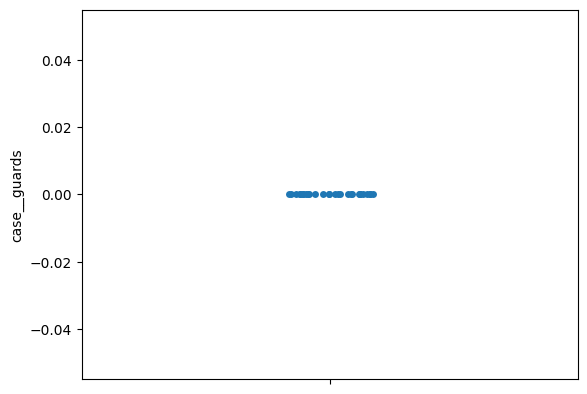

In [14]:
sns.stripplot(X['case__guards'])

El 100% toma el valor 0, más analisis no tienen sentido.

### Variable average_body_count (3/11)
Esta variable representa el número medio de sentencias en el cuerpo de los case. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1.0 - 3.0. Con una media de 1.91.

<Axes: ylabel='case__average_body_count'>

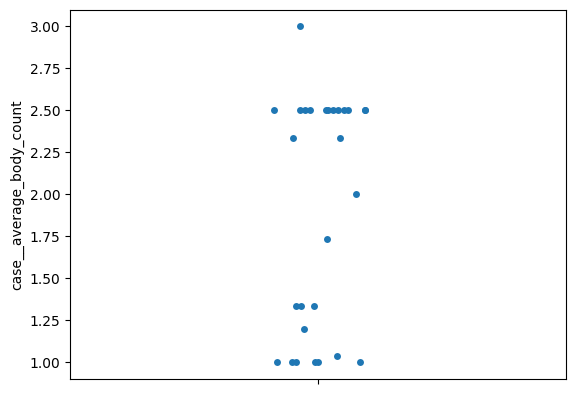

In [15]:
sns.stripplot(X['case__average_body_count'])

In [16]:
print_outliers_for_df_column(X, 'case__average_body_count')

El coeficiente MC (Medcouple Coefficient) de balanceo es: -0.08656095061563274
Rango valores atípicos extremos (Tukey): [-2.86078417301178,6.520588129758835]
Rango valores atípicos leves (Tukey): [-0.8504901081323624,4.510294064879417]
Rango valores atípicos extremos (Fixed BoxPlot): [-1.6822437468867575,3.9848558326486265]
-3.0IQR: 0 instancias tienen un valor para case__average_body_count inferior a -2.86078417301178 (Q1-3*IQR) para case__average_body_count. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para case__average_body_count inferior a -0.8504901081323624 (Q1-1.5*IQR) para case__average_body_count. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para case__average_body_count superior a 4.510294064879417 (Q3+1.5*IQR) para case__average_body_count. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para case__average_body_count superior a 6.520588129758835 (Q3-3*IQR) pa

In [17]:
X[X['case__average_body_count'] ==  1].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,case__number_of_cases,case__guards,case__average_match_value,case__average_body_count,case__average_match_singleton,case__average_match_sequence,case__average_match_mapping,case__average_match_class,case__average_match_star,case__average_match_as,case__average_match_or,case__expertise_level_EXPERT
count,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
mean,3.833333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,0.408248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,3.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,4.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,4.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,4.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,4.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Variable average_match_value (4/11)
Esta variable es de tipo numérica y nos indica el número medio de cases del tipo Value. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.5 - 1. Con una media de 0.71.

<Axes: ylabel='case__average_match_value'>

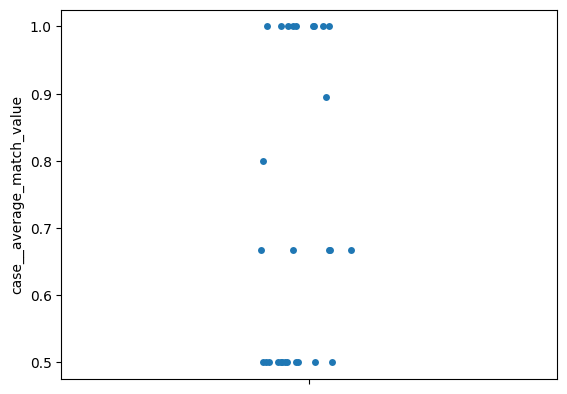

In [18]:
sns.stripplot(X['case__average_match_value'])

In [19]:
print_outliers_for_df_column(X, 'case__average_match_value')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.2360903024673462
Rango valores atípicos extremos (Tukey): [-1.0,2.5]
Rango valores atípicos leves (Tukey): [-0.25,1.75]
Rango valores atípicos extremos (Fixed BoxPlot): [0.17175602835051534,2.9283778117032297]
-3.0IQR: 0 instancias tienen un valor para case__average_match_value inferior a -1.0 (Q1-3*IQR) para case__average_match_value. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para case__average_match_value inferior a -0.25 (Q1-1.5*IQR) para case__average_match_value. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para case__average_match_value superior a 1.75 (Q3+1.5*IQR) para case__average_match_value. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para case__average_match_value superior a 2.5 (Q3-3*IQR) para case__average_match_value. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un 

In [21]:
X[X['case__average_match_value'] == 1.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,case__number_of_cases,case__guards,case__average_match_value,case__average_body_count,case__average_match_singleton,case__average_match_sequence,case__average_match_mapping,case__average_match_class,case__average_match_star,case__average_match_as,case__average_match_or,case__expertise_level_EXPERT
count,9.000000,9.0,9.0,9.000000,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
mean,9.111111,0.0,1.0,1.337691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,15.711815,0.0,0.0,0.704913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,3.000000,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,4.000000,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,4.000000,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,4.000000,0.0,1.0,1.039216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,51.000000,0.0,1.0,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Variable average_match_singleton (5/11)
Esta variable representa el número medio de cases del tipo Singleton. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 0. Con una media de 0.

<Axes: ylabel='case__average_match_singleton'>

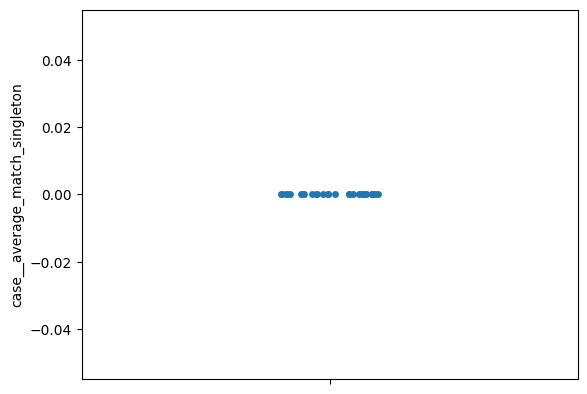

In [22]:
sns.stripplot(X['case__average_match_singleton'])

El 100% toma el valor 0, más analisis no tienen sentido.

### Variable average_match_sequence (6/11)
Esta variable representa el número medio de cases del tipo Sequence. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 0. Con una media de 0.

<Axes: ylabel='case__average_match_singleton'>

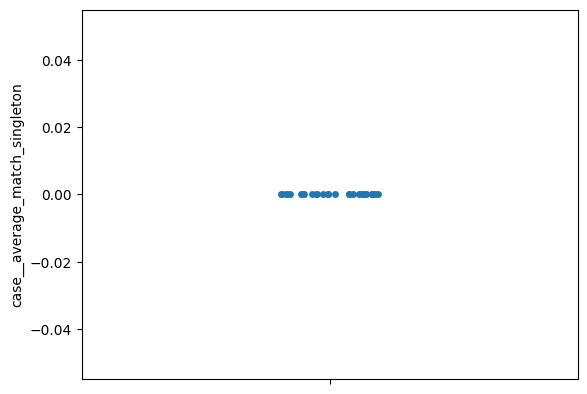

In [22]:
sns.stripplot(X['case__average_match_sequence'])

El 100% toma el valor 0, más analisis no tienen sentido.

### Variable average_match_mapping (7/11)
Esta variable representa el número medio de cases del tipo Mapping. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 0. Con una media de 0.

<Axes: ylabel='case__average_match_mapping'>

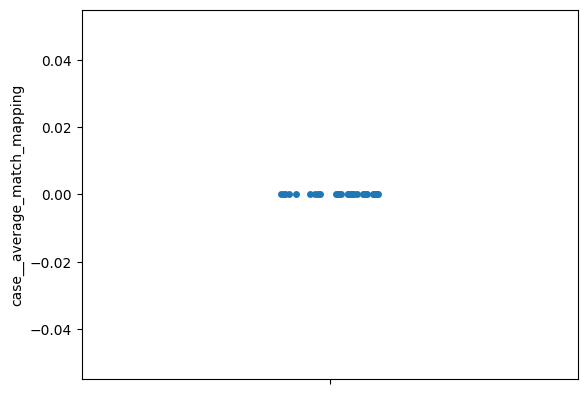

In [23]:
sns.stripplot(X['case__average_match_mapping'])

El 100% toma el valor 0, más analisis no tienen sentido.

### Variable average_match_star (8/11)
Esta variable representa el número medio de cases del tipo Star. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 0. Con una media de 0.

<Axes: ylabel='case__average_match_star'>

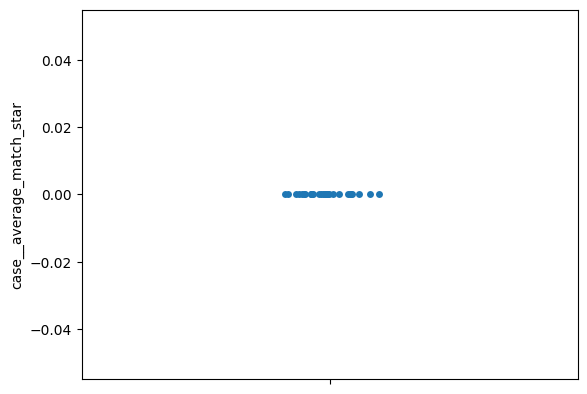

In [24]:
sns.stripplot(X['case__average_match_star'])

El 100% toma el valor 0, más analisis no tienen sentido.

### Variable average_match_or (9/11)
Esta variable representa el número medio de cases del tipo Or. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 0. Con una media de 0.

<Axes: ylabel='case__average_match_or'>

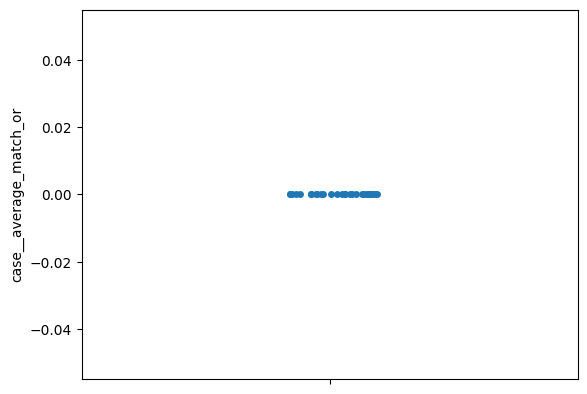

In [25]:
sns.stripplot(X['case__average_match_or'])

El 100% toma el valor 0, más analisis no tienen sentido.

### Variable average_match_class (10/11)
Esta variable es de tipo numérica y nos indica el número medio de cases del tipo Match. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 0.052. Con una media de 0.0018.

<Axes: ylabel='case__average_match_class'>

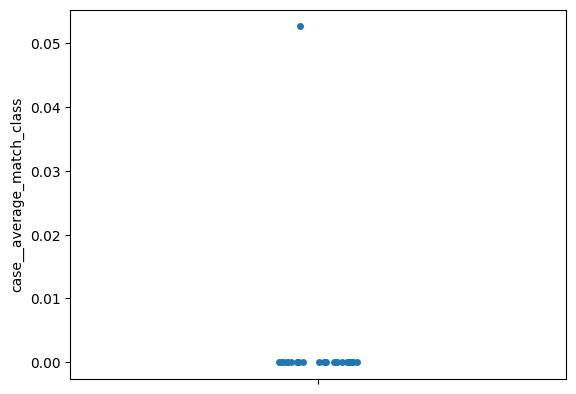

In [26]:
sns.stripplot(X['case__average_match_class'])

In [27]:
print_outliers_for_df_column(X, 'case__average_match_class')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8876517393053823
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para case__average_match_class inferior a 0.0 (Q1-3*IQR) para case__average_match_class. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para case__average_match_class inferior a 0.0 (Q1-1.5*IQR) para case__average_match_class. Representando un 0.0% del total de instancias.
+1.5IQR: 1 instancias tienen un valor para case__average_match_class superior a 0.0 (Q3+1.5*IQR) para case__average_match_class. Representando un 3.571% del total de instancias.
+3.0IQR: 1 instancias tienen un valor para case__average_match_class superior a 0.0 (Q3-3*IQR) para case__average_match_class. Representando un 3.571% del total de instancias.
L: 0 instancias tienen un valor para case__average_match_clas

In [28]:
X[X['case__average_match_class'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,case__number_of_cases,case__guards,case__average_match_value,case__average_body_count,case__average_match_singleton,case__average_match_sequence,case__average_match_mapping,case__average_match_class,case__average_match_star,case__average_match_as,case__average_match_or,case__expertise_level_EXPERT
count,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,1.0
mean,19.0,0.0,0.894737,1.736842,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,19.0,0.0,0.894737,1.736842,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,1.0
25%,19.0,0.0,0.894737,1.736842,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,1.0
50%,19.0,0.0,0.894737,1.736842,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,1.0
75%,19.0,0.0,0.894737,1.736842,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,1.0
max,19.0,0.0,0.894737,1.736842,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,1.0


El único distinto de 0 es un outlier

### Variable average_match_as (11/11)
Esta variable es de tipo numérica y nos indica el número medio de cases del tipo As. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 0.052. Con una media de 0.0018.

<Axes: ylabel='case__average_match_as'>

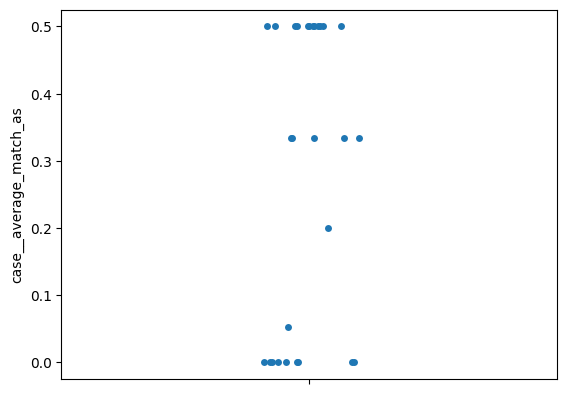

In [29]:
sns.stripplot(X['case__average_match_as'])

In [30]:
print_outliers_for_df_column(X, 'case__average_match_as')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.19613221773605097
Rango valores atípicos extremos (Tukey): [-1.5,2.0]
Rango valores atípicos leves (Tukey): [-0.75,1.25]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.3775150534014556,2.143530708049444]
-3.0IQR: 0 instancias tienen un valor para case__average_match_as inferior a -1.5 (Q1-3*IQR) para case__average_match_as. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para case__average_match_as inferior a -0.75 (Q1-1.5*IQR) para case__average_match_as. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para case__average_match_as superior a 1.25 (Q3+1.5*IQR) para case__average_match_as. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para case__average_match_as superior a 2.0 (Q3-3*IQR) para case__average_match_as. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valor para case__average

In [31]:
X[X['case__average_match_as'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,case__number_of_cases,case__guards,case__average_match_value,case__average_body_count,case__average_match_singleton,case__average_match_sequence,case__average_match_mapping,case__average_match_class,case__average_match_star,case__average_match_as,case__average_match_or,case__expertise_level_EXPERT
count,19.000000,19.0,19.000000,19.000000,19.0,19.0,19.0,19.000000,19.0,19.000000,19.0,19.0
mean,3.315789,0.0,0.580425,2.189658,0.0,0.0,0.0,0.002770,0.0,0.416805,0.0,1.0
std,3.873738,0.0,0.120603,0.504500,0.0,0.0,0.0,0.012075,0.0,0.128565,0.0,0.0
min,2.000000,0.0,0.500000,1.200000,0.0,0.0,0.0,0.000000,0.0,0.052632,0.0,1.0
25%,2.000000,0.0,0.500000,2.035088,0.0,0.0,0.0,0.000000,0.0,0.333333,0.0,1.0
50%,2.000000,0.0,0.500000,2.500000,0.0,0.0,0.0,0.000000,0.0,0.500000,0.0,1.0
75%,3.000000,0.0,0.666667,2.500000,0.0,0.0,0.0,0.000000,0.0,0.500000,0.0,1.0
max,19.000000,0.0,0.894737,2.500000,0.0,0.0,0.0,0.052632,0.0,0.500000,0.0,1.0


## Multivariate

TODO: isolation forest algorithm

In [43]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012

isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.to_numpy())
mask = isof_prediction == -1
multivar_outliers = X[mask].index.tolist()
full_table.iloc[multivar_outliers]

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct,import__expertise_level
325,14,0.928571,1.0,0.071429,1.0,1.000000,0.928571,EXPERT
9697,91,0.000000,0.0,1.000000,1.0,0.307692,0.000000,EXPERT
11395,1,0.000000,0.0,1.000000,1.0,1.000000,0.000000,BEGINNER
13146,4,0.250000,3.0,0.750000,1.0,0.666667,0.000000,BEGINNER
13187,4,0.250000,3.0,0.750000,1.0,0.666667,0.000000,BEGINNER
13258,4,0.250000,3.0,0.750000,1.0,0.666667,0.000000,BEGINNER
15227,1,0.000000,0.0,1.000000,1.0,1.000000,0.000000,BEGINNER
15779,1,0.000000,0.0,1.000000,1.0,1.000000,0.000000,BEGINNER
16484,1,0.000000,0.0,1.000000,1.0,1.000000,0.000000,BEGINNER
17146,1,0.000000,0.0,1.000000,1.0,1.000000,0.000000,BEGINNER
